## question 2

part a)

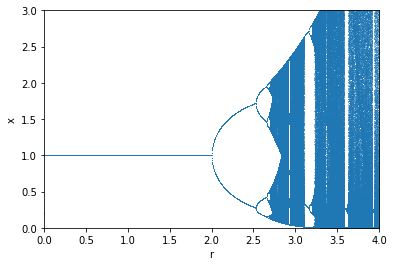

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from fractions import Fraction

def logistic(x,r):
    return x*np.exp(r*(1-x))
  

def bifurcation_diagram(rmin=0, rmax=4,r_N=2000, N_min=4000, N=1000):
    x_0 = 0.2
    rset = []
    xset = []
    
    r_range = np.linspace(rmin, rmax, r_N)

    for r in r_range:
        x = x_0;
        for i in range(N+N_min):
            x = logistic(x,r);
            
            if i > N_min:
                rset.append(r)
                xset.append(x)
                
                
    plt.scatter(rset,xset,s=0.3,c='C0', linewidth=0)
    plt.ylim(0, 3)
    plt.xlim(rmin, rmax)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.show()    
            
bifurcation_diagram(rmin=0, rmax = 4, r_N=2000, N_min=4000, N=1000)

part b)

yes this map does become chaotic, as you can see from the bifurcation diagram above and more specifically from the one below, it becomes chaotic around r = 2.91

r_infty = 2.691

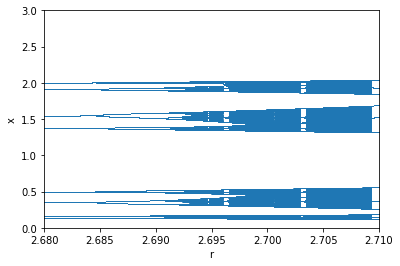

In [131]:
bifurcation_diagram(rmin=2.68, rmax = 2.71, r_N=2000, N_min=4000, N=1000)

part c)

In [132]:
step= [0.118423066]
for i in range(20):
    step.append(logistic(step[i],2.691))
    print(step[i])
    
len(step)#just making sure of length 
# i did it this way and not just print px is px had everyone of them but twice

0.118423066
1.2697649036230785
0.6144021562873445
1.7341861228089621
0.24047079132098803
1.8565806839427346
0.18519940554870773
1.6591513440427625
0.2815430158377965
1.9462368949860298
0.1525251507269958
1.4920172235670557
0.39697209002977635
2.0114559292497836
0.13226218150068408
1.3663095783154902
0.5098566309824504
1.9066544274269877
0.16621768958674296
1.567138320906436


21

part d)

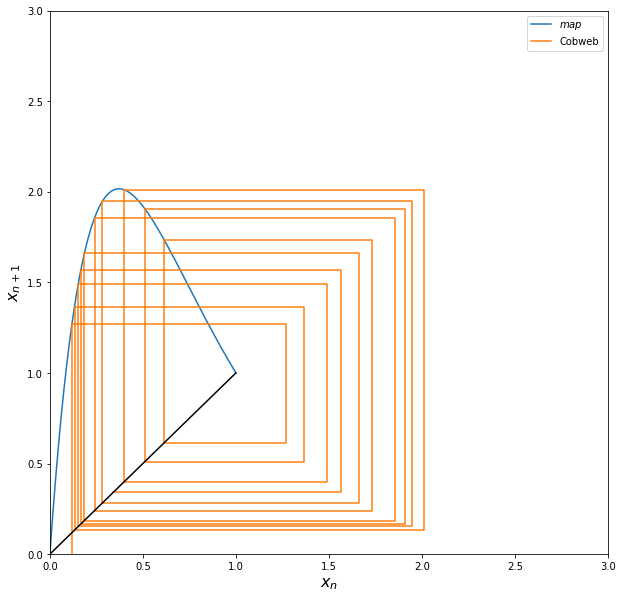

In [136]:
N=21

x0 = 0.118423066

px = []
py = []

px.append(x0)
py.append(0)

for n in range(1,N):
    PX = px[-1]
    PY = logistic(px[-1],2.691)
    px.append(PX)
    py.append(PY)
    px.append(PY)
    py.append(PY)
    
    
myt = np.linspace(0,1,1000)
plt.figure(figsize=(10,10))
plt.plot(myt,logistic(myt,2.691),label=r'$map$')
plt.plot(px,py,label=r'Cobweb')
plt.plot(myt,myt,'k')


plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel(r'$x_{n}$',fontsize=16)
plt.ylabel(r'$x_{n+1}$',fontsize=16)
plt.legend()
plt.show()

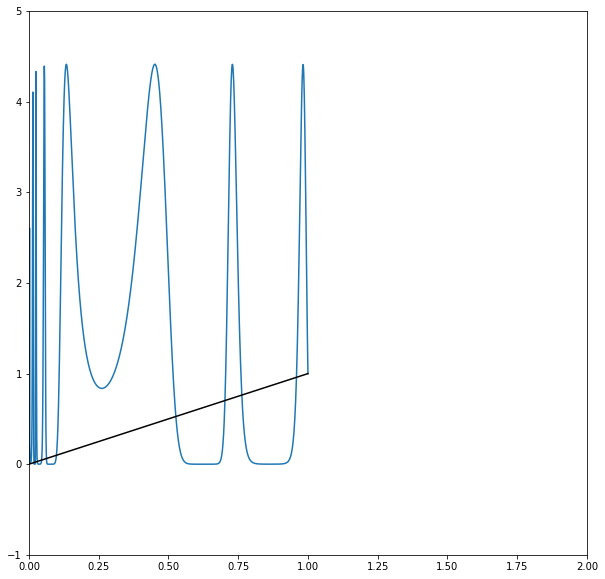

In [124]:
r = 2.691
myt = np.linspace(0,1,1000)
plt.figure(figsize=(10,10))
plt.plot(myt,logistic(logistic(logistic(logistic(logistic(myt,r),r),r),r),r))
plt.plot(myt,myt,'k')
plt.xlim(0,2)
plt.ylim(-1.0,5)
plt.show()

In [144]:
@interact(x0=(0, 1, 0.01), r=(0,4,0.01), N=(20,2000,10))
def cobweb(x0 = 0.5, r=0.5, N = 20):
    plt.figure(figsize=(7,7))
    myt = np.linspace(0,1,100)
    plt.plot(myt, logistic(myt,r),label=r"Logistic Map")
    plt.plot(myt,myt)
    px = []
    py = []
    #Initialise
    px.append(x0)
    py.append(0)

    for n in range(1,N):
        PX = px[-1]
        PY = logistic(px[-1],r)
        px.append(PX)#x0
        px.append(PY)#x0
        py.append(PY)#f(x0)
        py.append(PY)#f(x0)
     
    plt.plot(px,py,label=r'Cobweb')
    plt.plot(myt,myt,'k')
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.xlabel(r'$x_{n}$',fontsize=16)
    plt.ylabel(r'$x_{n+1}$',fontsize=16)
    plt.legend()
    plt.show()  

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=0.5, des…

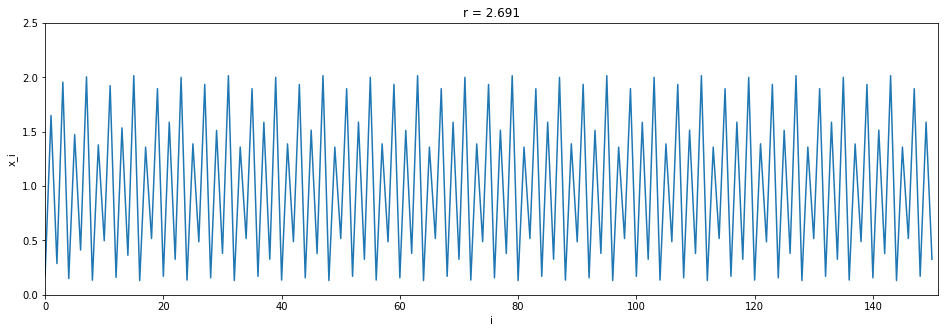

In [140]:
x = 0.183
r=2.691
N=150
arr_i = []
arr_i.append(0)
arr_x = []
arr_x.append(x)

for i in range(1,N+1):
    x = logistic(x,r)
    arr_i.append(i)
    arr_x.append(x)

plt.figure(figsize=(16,5))
plt.title("r = " + str(r))
plt.plot(arr_i,arr_x)
plt.ylim(0,2.5)
plt.xlim(0,N+1)
plt.xlabel("i")
plt.ylabel("x_i")
plt.show()

it seems like a stable 3 cycle to me.

question 3 b) part i)

In [125]:
def fifths(iv):
    left,right = iv
    l1 = left
    r3 = right
    length = (right-left)/5
    r1 = l1 + length
    l2 = r1 + length
    r2= l2 + length
    l3 = r2 + length
    
    return [[l1,r1],[l2,r2],[l3,r3]]

In [126]:
fifths([0,1])

[[0, 0.2], [0.4, 0.6000000000000001], [0.8, 1]]

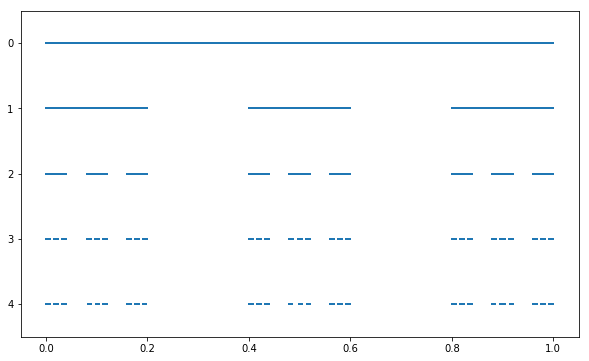

In [127]:
kmax = 5
#plt.hold(True)
ivlist = [[0,1]]
plt.figure(figsize=(10,6))
for k in range(kmax):
    newivlist = []
    for iv in ivlist:
        newivlist += fifths(iv)
        plt.plot(iv,[k,k],lw=2,color="C0")
    ivlist = newivlist

plt.ylim(kmax-0.5,-0.5)
plt.show()   

C:\Users\danke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


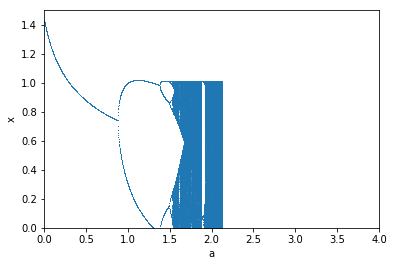

In [148]:
def henon(x, a, b=0.3):
    return b*x + 1 - a*x*x

def bifurcation_diagram(rmin=0, rmax=1.4,r_N=2000, N_min=4000, N=1000):
    x_0 = 0.2
    rset = []
    xset = []
    
    r_range = np.linspace(rmin, rmax, r_N)

    for r in r_range:
        x = x_0;
        for i in range(N+N_min):
            x = henon(x,r);
            
            if i > N_min:
                rset.append(r)
                xset.append(x)
                
                
    plt.scatter(rset,xset,s=0.3,c='C0', linewidth=0)
    plt.ylim(0, 1.5)
    plt.xlim(rmin, rmax)
    plt.xlabel('a')
    plt.ylabel('x')
    plt.show()    
            
bifurcation_diagram(rmin=0, rmax = 4, r_N=2000, N_min=4000, N=1000)

period doubling can occur, but i think choas starts at around 1.52